In [1]:
import pandas as pd
import numpy as np
import math
# import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
import lightgbm as lgb


import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
path = "data/分析残差和单词属性关系.xlsx"
df = pd.read_excel(path)

In [23]:
df.fillna(0, inplace=True)

In [24]:
df.Residual

0     -308.003728
1      264.125790
2     -217.754277
3     -315.750583
4      714.706633
          ...    
346      0.000000
347      0.000000
348      0.000000
349      0.000000
350      0.000000
Name: Residual, Length: 351, dtype: float64

In [25]:
X = df.loc[:, ['Contest number', 'Number of  reported results', 
       'is_repetitive', 'repetitive numbers', 'number of vowels',
        'word freq', 'number of common letter','Residual',
       'letter1 freq', 'letter2 freq', 'letter4 freq', 
       'letter5 freq', '5 letters freq', 'a', 'b', 'c', 'd', 'e', 'f', 'g',
       'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
       'v', 'w', 'x', 'y', 'z', '1 is vowel', '2 is vowel', '3 is vowel',
       '4 is vowel', '5 is vowel', 'cl_included1', 'cl_included']]
y = df.loc[:, ['1 try','2 tries', '3 tries', '4 tries', '5 tries', '6 tries',
       '7 or more tries (X)']]

In [26]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

In [27]:
# 将数据集分为训练集和测试集，比例为0.8:0.2
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, 
                                                    test_size=0.2, random_state=42)

In [28]:
# 创建一个LinearRegression对象
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# 对测试集进行预测
y_pred = model.predict(X_test)

In [30]:
# 计算MSE和MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# 打印结果
print('MSE:', mse)
print('MAE:', mae)

r2 = r2_score(y_test, y_pred)
print("R方: ", r2)

MSE: 0.6812459948419727
MAE: 0.6188773590529076
R方:  0.343048987561415


In [31]:
# 创建随机森林模型
model1 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# 拟合模型
model1.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [32]:
# 预测结果
y_pred = model1.predict(X_test)

# 计算均方误差
# 计算MSE和MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# 打印结果
print('MSE:', mse)
print('MAE:', mae)
r2 = r2_score(y_test, y_pred)
print("R方: ", r2)

MSE: 0.6876716834087563
MAE: 0.6064288925627697
R方:  0.347597958981624


In [794]:


# 创建LightGBM模型
params = {'objective': 'regression', 
          'boosting' : 'gbdt',
          'max_depth': 5,
          'num_leaves': 16,
          'learning_rate': 0.1,
          'metric': 'rmse'}
model = lgb.LGBMRegressor(**params)
wrapper = MultiOutputRegressor(model)
# 训练模型
wrapper.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = wrapper.predict(X_test)

# 计算均方误差
# 计算MSE和MAE
mse = mean_squared_error(y_test[:, :-1], y_pred[:, :-1])
mae = mean_absolute_error(y_test[:, :-1], y_pred[:, :-1])

# 打印结果
print('MSE:', mse)
print('MAE:', mae)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
MSE: 0.5744196674852521
MAE: 0.5638235682351601


In [709]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neural_network import MLPRegressor

# 定义多个模型
models = [
    MultiOutputRegressor(LinearRegression()),
    MultiOutputRegressor(DecisionTreeRegressor()),
    MultiOutputRegressor(RandomForestRegressor(max_depth=4, random_state=42)),
    MLPRegressor(hidden_layer_sizes=(4,4),random_state=1, max_iter=1000)
]

# 对每个模型进行训练并预测测试集
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test[:, :-1], y_pred[:, :-1])
    print(f"{model} MSE: {mse}")

MultiOutputRegressor(estimator=LinearRegression()) MSE: 0.6260179335099646
MultiOutputRegressor(estimator=DecisionTreeRegressor()) MSE: 1.2217759313780736
MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=4,
                                                     random_state=42)) MSE: 0.6916644696318673
MLPRegressor(hidden_layer_sizes=(4, 4), max_iter=1000, random_state=1) MSE: 0.7601428180501916


In [710]:
lr_pred = models[0].predict(X_test)
dt_pred = models[1].predict(X_test)
tf_pred = models[2].predict(X_test)
mlp_pred = models[3].predict(X_test)
a = 0.2
b = 0.2
c = 0.1
d = 1
ensemble_pred = (a*lr_pred + b*tf_pred + c*mlp_pred + d*mlp_pred) / (a + b + c + d)
ensemble_mse = mean_squared_error(y_test, ensemble_pred)
print('Ensemble MSE:', ensemble_mse)

Ensemble MSE: 0.7064963769396491


In [711]:
pd.concat([pd.DataFrame(models[0].predict(X_train)),
                        pd.DataFrame(models[2].predict(X_train)),
                        pd.DataFrame(models[3].predict(X_train))],axis=1).shape

(280, 21)

In [589]:
models[0].predict(X_train).shape

(280, 7)

In [590]:
y_train.shape

(280, 7)

In [591]:
model_L2 = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model_L2.fit(pd.concat([pd.DataFrame(models[0].predict(X_train)),
                        pd.DataFrame(models[2].predict(X_train)),
                        pd.DataFrame(models[3].predict(X_train))],axis=1).values,y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [592]:
L2_pred = model_L2.predict(pd.concat([pd.DataFrame(models[0].predict(X_test)),
                        pd.DataFrame(models[2].predict(X_test)),
                        pd.DataFrame(models[3].predict(X_test))],axis=1).values)

In [593]:
L2_mse = mean_squared_error(y_test, L2_pred)
print('model L2 MSE:', L2_mse)

model L2 MSE: 0.6692581365108811


In [594]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR

model = LinearSVR()
wrapper = MultiOutputRegressor(model)

wrapper.fit(X_train, y_train)

y_pred = wrapper.predict(X_test)

# 计算均方误差
# 计算MSE和MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# 打印结果
print('MSE:', mse)
print('MAE:', mae)

MSE: 0.7247014220874728
MAE: 0.5836317195585818


/Users/haddless/opt/anaconda3/envs/bd/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/haddless/opt/anaconda3/envs/bd/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/haddless/opt/anaconda3/envs/bd/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/haddless/opt/anaconda3/envs/bd/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/haddless/opt/anaconda3/envs/bd/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/haddless/opt/anaco

In [543]:
y_pred[:,0].shape

(71,)

In [544]:
model = GradientBoostingRegressor(random_state=42)
wrapper = MultiOutputRegressor(model)

wrapper.fit(X_train, y_train)

y_pred = wrapper.predict(X_test)

# 计算均方误差
# 计算MSE和MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# 打印结果
print('MSE:', mse)
print('MAE:', mae)

MSE: 0.62775007524996
MAE: 0.5606674690146576


/Users/haddless/opt/anaconda3/envs/bd/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/haddless/opt/anaconda3/envs/bd/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/haddless/opt/anaconda3/envs/bd/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/haddless/opt/anaconda3/envs/bd/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38469 (\N{CJK UNIFIED IDEOGRAPH-9645}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/haddless/opt/anaconda3/envs/bd/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: Us

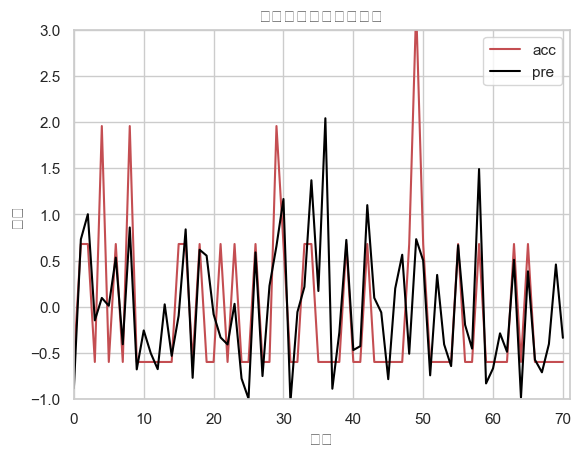

In [545]:
plt.plot(y_test[:,0],color="r",label="acc") #颜色表示
 
plt.plot(y_pred[:,0],color=(0,0,0),label="pre") 
 
plt.xlabel("个数") #x轴命名表示
 
plt.ylabel("价格") #y轴命名表示
 
plt.axis([0,71,-1,3])#设定x轴 y轴的范围
 
plt.title("实际值与预测值折线图") 
 
plt.legend()#增加图例
 
plt.show() #显示图片